In lecture 19 of mcs 320, we define mathematical functions.

# 1. Symbolic Functions are Expressions

We recall that expressions are callable.  This means that we can evaluate them, numerically or symbolically.

Let us consider a function of two variables, $x$ and $y$:

$$
   f(x,y) = \exp(-x^2 - y^2) (\sin(x) + \cos(y)).
$$

In [1]:
f(x,y) = exp(-x^2 - y^2)*(sin(x) + cos(y))
f

(x, y) |--> (cos(y) + sin(x))*e^(-x^2 - y^2)

In [2]:
type(f)

<class 'sage.symbolic.expression.Expression'>

Although ``f`` looks differently when we ask for its value, it is a symbolic expression.

With *symbolic evaluation* we can go back and forth between an expression and a function.

In [3]:
u, v = var('u, v')
e = f(x=u, y=v)
e

(cos(v) + sin(u))*e^(-u^2 - v^2)

In [4]:
type(e)

<class 'sage.symbolic.expression.Expression'>

In [5]:
g(x,y) = e(u=x, v=y)
g

(x, y) |--> (cos(y) + sin(x))*e^(-x^2 - y^2)

In [6]:
g.variables()

(x, y)

In [7]:
e.variables()

(u, v)

There is not much difference then between functions and expressions, for both derivatives and antiderivatives are defined.

In [8]:
f.derivative(x)

(x, y) |--> -2*x*(cos(y) + sin(x))*e^(-x^2 - y^2) + cos(x)*e^(-x^2 - y^2)

In [9]:
f.integral(x)

(x, y) |--> 1/2*sqrt(pi)*cos(y)*erf(x)*e^(-y^2) + 1/4*sqrt(pi)*(I*erf(x + 1/2*I) - I*erf(x - 1/2*I))*e^(-y^2 - 1/4)

In [10]:
e.derivative(u)

-2*u*(cos(v) + sin(u))*e^(-u^2 - v^2) + cos(u)*e^(-u^2 - v^2)

In [11]:
e.integral(u)

1/2*sqrt(pi)*cos(v)*erf(u)*e^(-v^2) + 1/4*sqrt(pi)*(I*erf(u + 1/2*I) - I*erf(u - 1/2*I))*e^(-v^2 - 1/4)

# 2. Python Functions and Expressions

Observe the difference with Python functions.

In [12]:
def p(x, y):
    return exp(-x^2 - y^2)*(sin(x) + cos(y))

In [13]:
type(p)

<class 'function'>

The methods ``derivative()`` and ``integral()`` are not defined on Python functions, but ...

We can evaluate Python functions in symbols to obtain expressions.

In [14]:
ep = p(x=u, y=v)
ep

(cos(v) + sin(u))*e^(-u^2 - v^2)

In [15]:
type(ep)

<class 'sage.symbolic.expression.Expression'>

# 3. Step and Piecewise Functions

The unit step function is defined as

1. $f(x) = 0$, if $x < 0$.

2. $f(x) = 1$, if $x \geq 0$.

In [16]:
unit_step(-1)

0

In [17]:
unit_step(0)

1

In [18]:
unit_step(1)

1

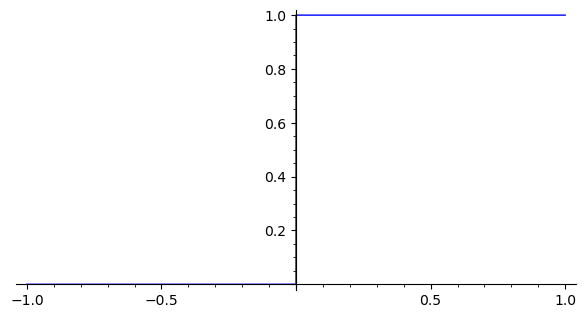

In [19]:
plot(unit_step(x), (x, -1, 1), aspect_ratio=1)

The unit step function can be defined as the limit of $1/(1 + exp(-2 k x)$, for increasing values of $k$ to $\infty$.

In [20]:
h(x, k) = 1/(1 + exp(-2*k*x))

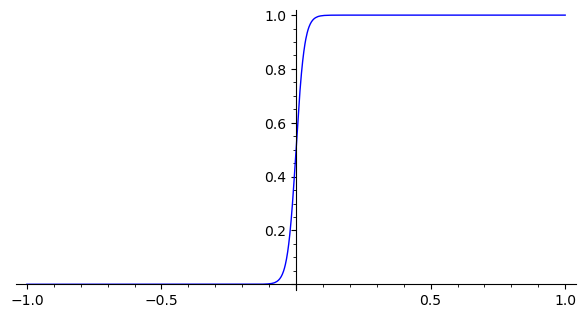

In [21]:
plot(h(x, 32), (x, -1, 1), aspect_ratio=1)

The Heaviside function is similar to the unit step function, but with the value of $1/2$ at $x=0$.

In [22]:
diff(unit_step(x), x)

dirac_delta(x)

In [23]:
dirac_delta(-1)

0

In [24]:
dirac_delta(0)

dirac_delta(0)

In [25]:
dirac_delta(1)

0

The Dirac delta function is everywhere zero, except for a spike at the origin.

The Kronecker delta is another delta function.

In [26]:
kronecker_delta(1, 2)

0

In [27]:
kronecker_delta(1, 1)

1

With unit step functions, we can define a staircase function.

1. $f(x) = 0$ if $x < 0$.

2. $f(x) = 1/3$ if $x \in [0, 1)$.

3. $f(x) = 2/3$ if $x \in [1, 2)$

4. $f(x) = 1$ if $x \geq 2$.

In [28]:
f(x) = unit_step(x)/3 + unit_step(x-1)/3 + unit_step(x-2)/3
f

x |--> 1/3*unit_step(x - 1) + 1/3*unit_step(x - 2) + 1/3*unit_step(x)

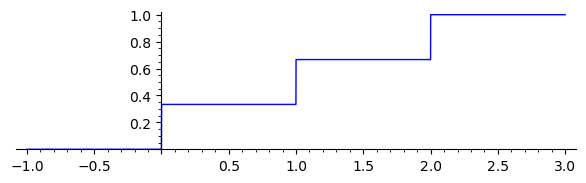

In [29]:
plot(f(x), (x, -1, 3), aspect_ratio=1)

Alternatively, we can use ``piecewise``.  

* The ``piecewise`` takes on input a list of tuples.

* The first element of each tuple is an interval and the second element is the value of the function on that interval.

* Closed intervals are defined with [].

* Open intervals are defined with ().

In [30]:
g = piecewise([((-infinity, 0), 0), ((0,1), 1/3), ([1,1], 1/3), ((1,2), 2/3), ([2,2], 1), ((2, infinity), 1)])
g

piecewise(x|-->0 on (-oo, 0), x|-->1/3 on (0, 1), x|-->1/3 on {1}, x|-->2/3 on (1, 2), x|-->1 on {2}, x|-->1 on (2, +oo); x)

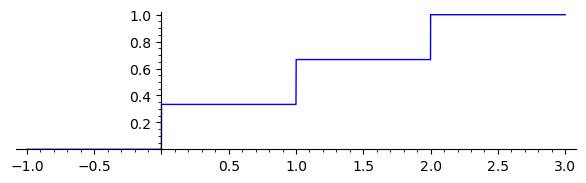

In [31]:
plot(g(x), (x, -1, 3), aspect_ratio=1)